In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import plotly.graph_objects as go
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix

In [ ]:
Data = pd.read_csv("/content/car data.csv")
Data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
Data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:

list_encoder = ['Car_Name' , 'Fuel_Type' ,'Seller_Type' , 'Transmission' ]
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
for feature in list_encoder:
    encode_feature = encoder.fit_transform(Data[[feature]])
    Data['encode_' + feature] = encode_feature



In [ ]:
Data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,encode_Car_Name,encode_Fuel_Type,encode_Seller_Type,encode_Transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,90.0,2.0,0.0,1.0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,93.0,1.0,0.0,1.0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,68.0,2.0,0.0,1.0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,96.0,2.0,0.0,1.0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,92.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,69.0,1.0,0.0,1.0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,66.0,2.0,0.0,1.0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,69.0,2.0,0.0,1.0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,69.0,1.0,0.0,1.0


In [ ]:
Data = Data.drop(['Car_Name' , 'Fuel_Type' , 'Seller_Type' , 'Transmission'] , axis = 1)

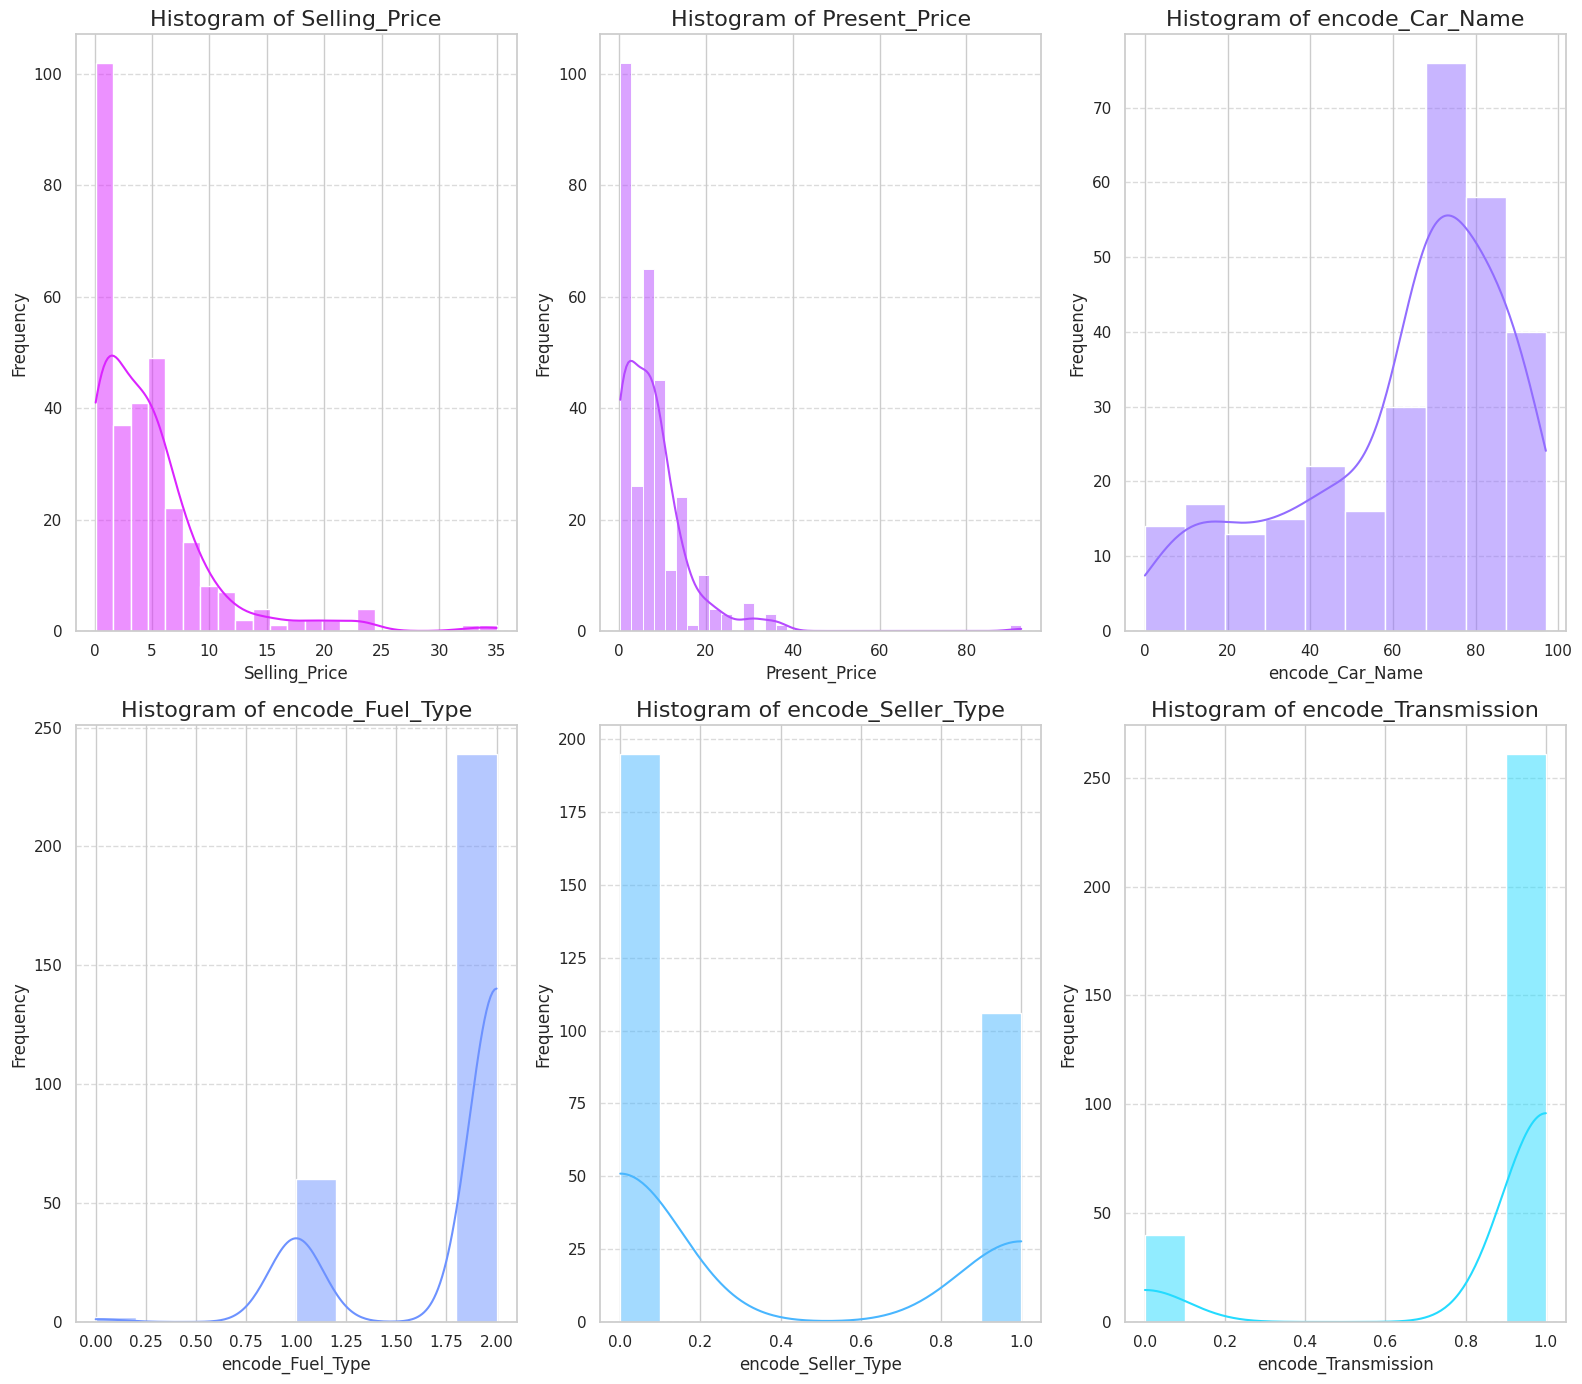

In [ ]:

float_cols = list(Data.select_dtypes('float').columns)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 14), dpi=100)

sns.set(style='whitegrid')
palette = sns.color_palette("cool", len(float_cols))

for col, ax in zip(float_cols, axes.ravel()):

    sns.histplot(data=Data, x=col, ax=ax, kde=True, color=palette.pop())
    ax.set_title(f'Histogram of {col}', fontsize=13)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [ ]:
Data.insert(0,"Age",Data.Year.max() - Data.Year +1)

In [ ]:
 Data = Data.drop(['Year'] , axis = 1)

In [ ]:
mean_age = np.mean(Data['Age'])
mean_kmsDriven = np.mean(Data['Kms_Driven'])

In [ ]:
ratio = mean_kmsDriven / mean_age

In [ ]:
Data['Km_of_OneYear'] = Data['Kms_Driven'] / Data['Age']

In [ ]:
Data

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,encode_Car_Name,encode_Fuel_Type,encode_Seller_Type,encode_Transmission,Km_of_OneYear
0,5,3.35,5.59,27000,0,90.0,2.0,0.0,1.0,5400.000000
1,6,4.75,9.54,43000,0,93.0,1.0,0.0,1.0,7166.666667
2,2,7.25,9.85,6900,0,68.0,2.0,0.0,1.0,3450.000000
3,8,2.85,4.15,5200,0,96.0,2.0,0.0,1.0,650.000000
4,5,4.60,6.87,42450,0,92.0,1.0,0.0,1.0,8490.000000
...,...,...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,0,69.0,1.0,0.0,1.0,11329.333333
297,4,4.00,5.90,60000,0,66.0,2.0,0.0,1.0,15000.000000
298,10,3.35,11.00,87934,0,69.0,2.0,0.0,1.0,8793.400000
299,2,11.50,12.50,9000,0,69.0,1.0,0.0,1.0,4500.000000


<Axes: >

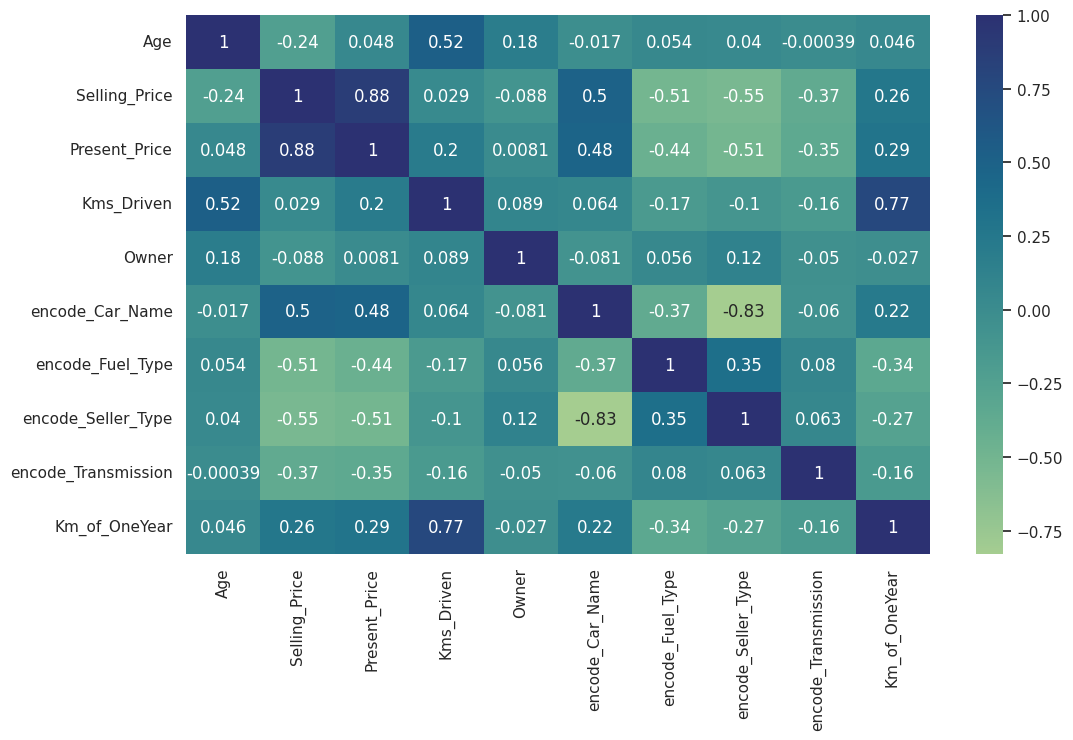

In [ ]:
plt.figure(figsize=(12, 7), dpi=100)
sns.heatmap(Data.corr(), cmap="crest" , annot=True)

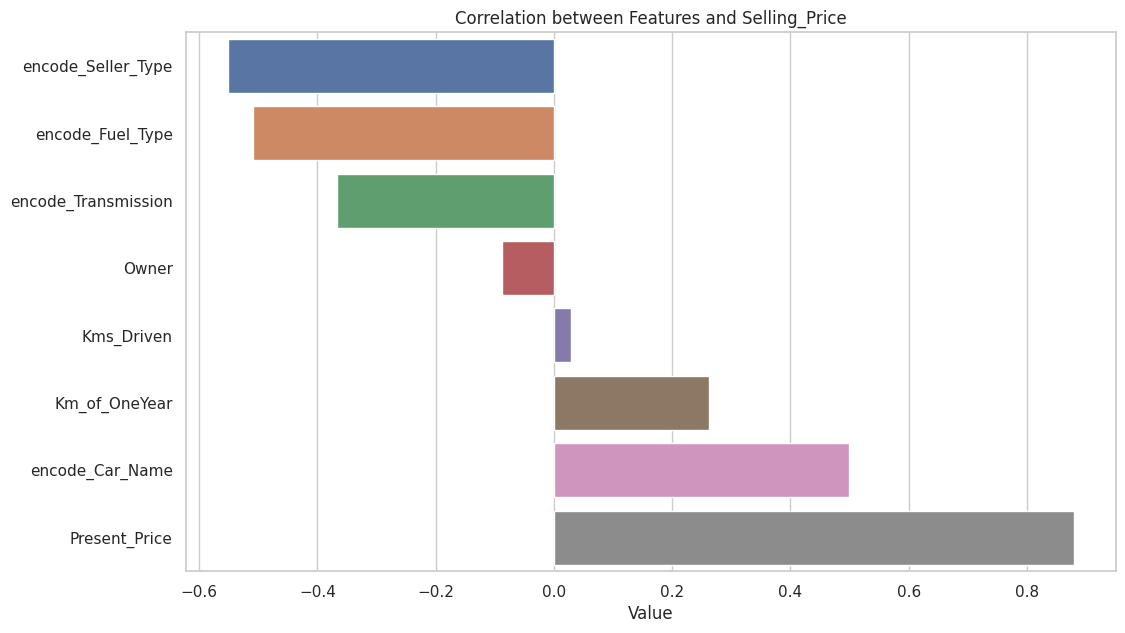

In [ ]:


Data_corr = Data.corr()['Selling_Price'][1:].drop('Selling_Price', axis=0)

plt.figure(figsize=(12, 7), dpi=100)
plt.title('Correlation between Features and Selling_Price')
sns.barplot(y=Data_corr.sort_values().index, x=Data_corr.sort_values().values)
plt.xlabel('Value');



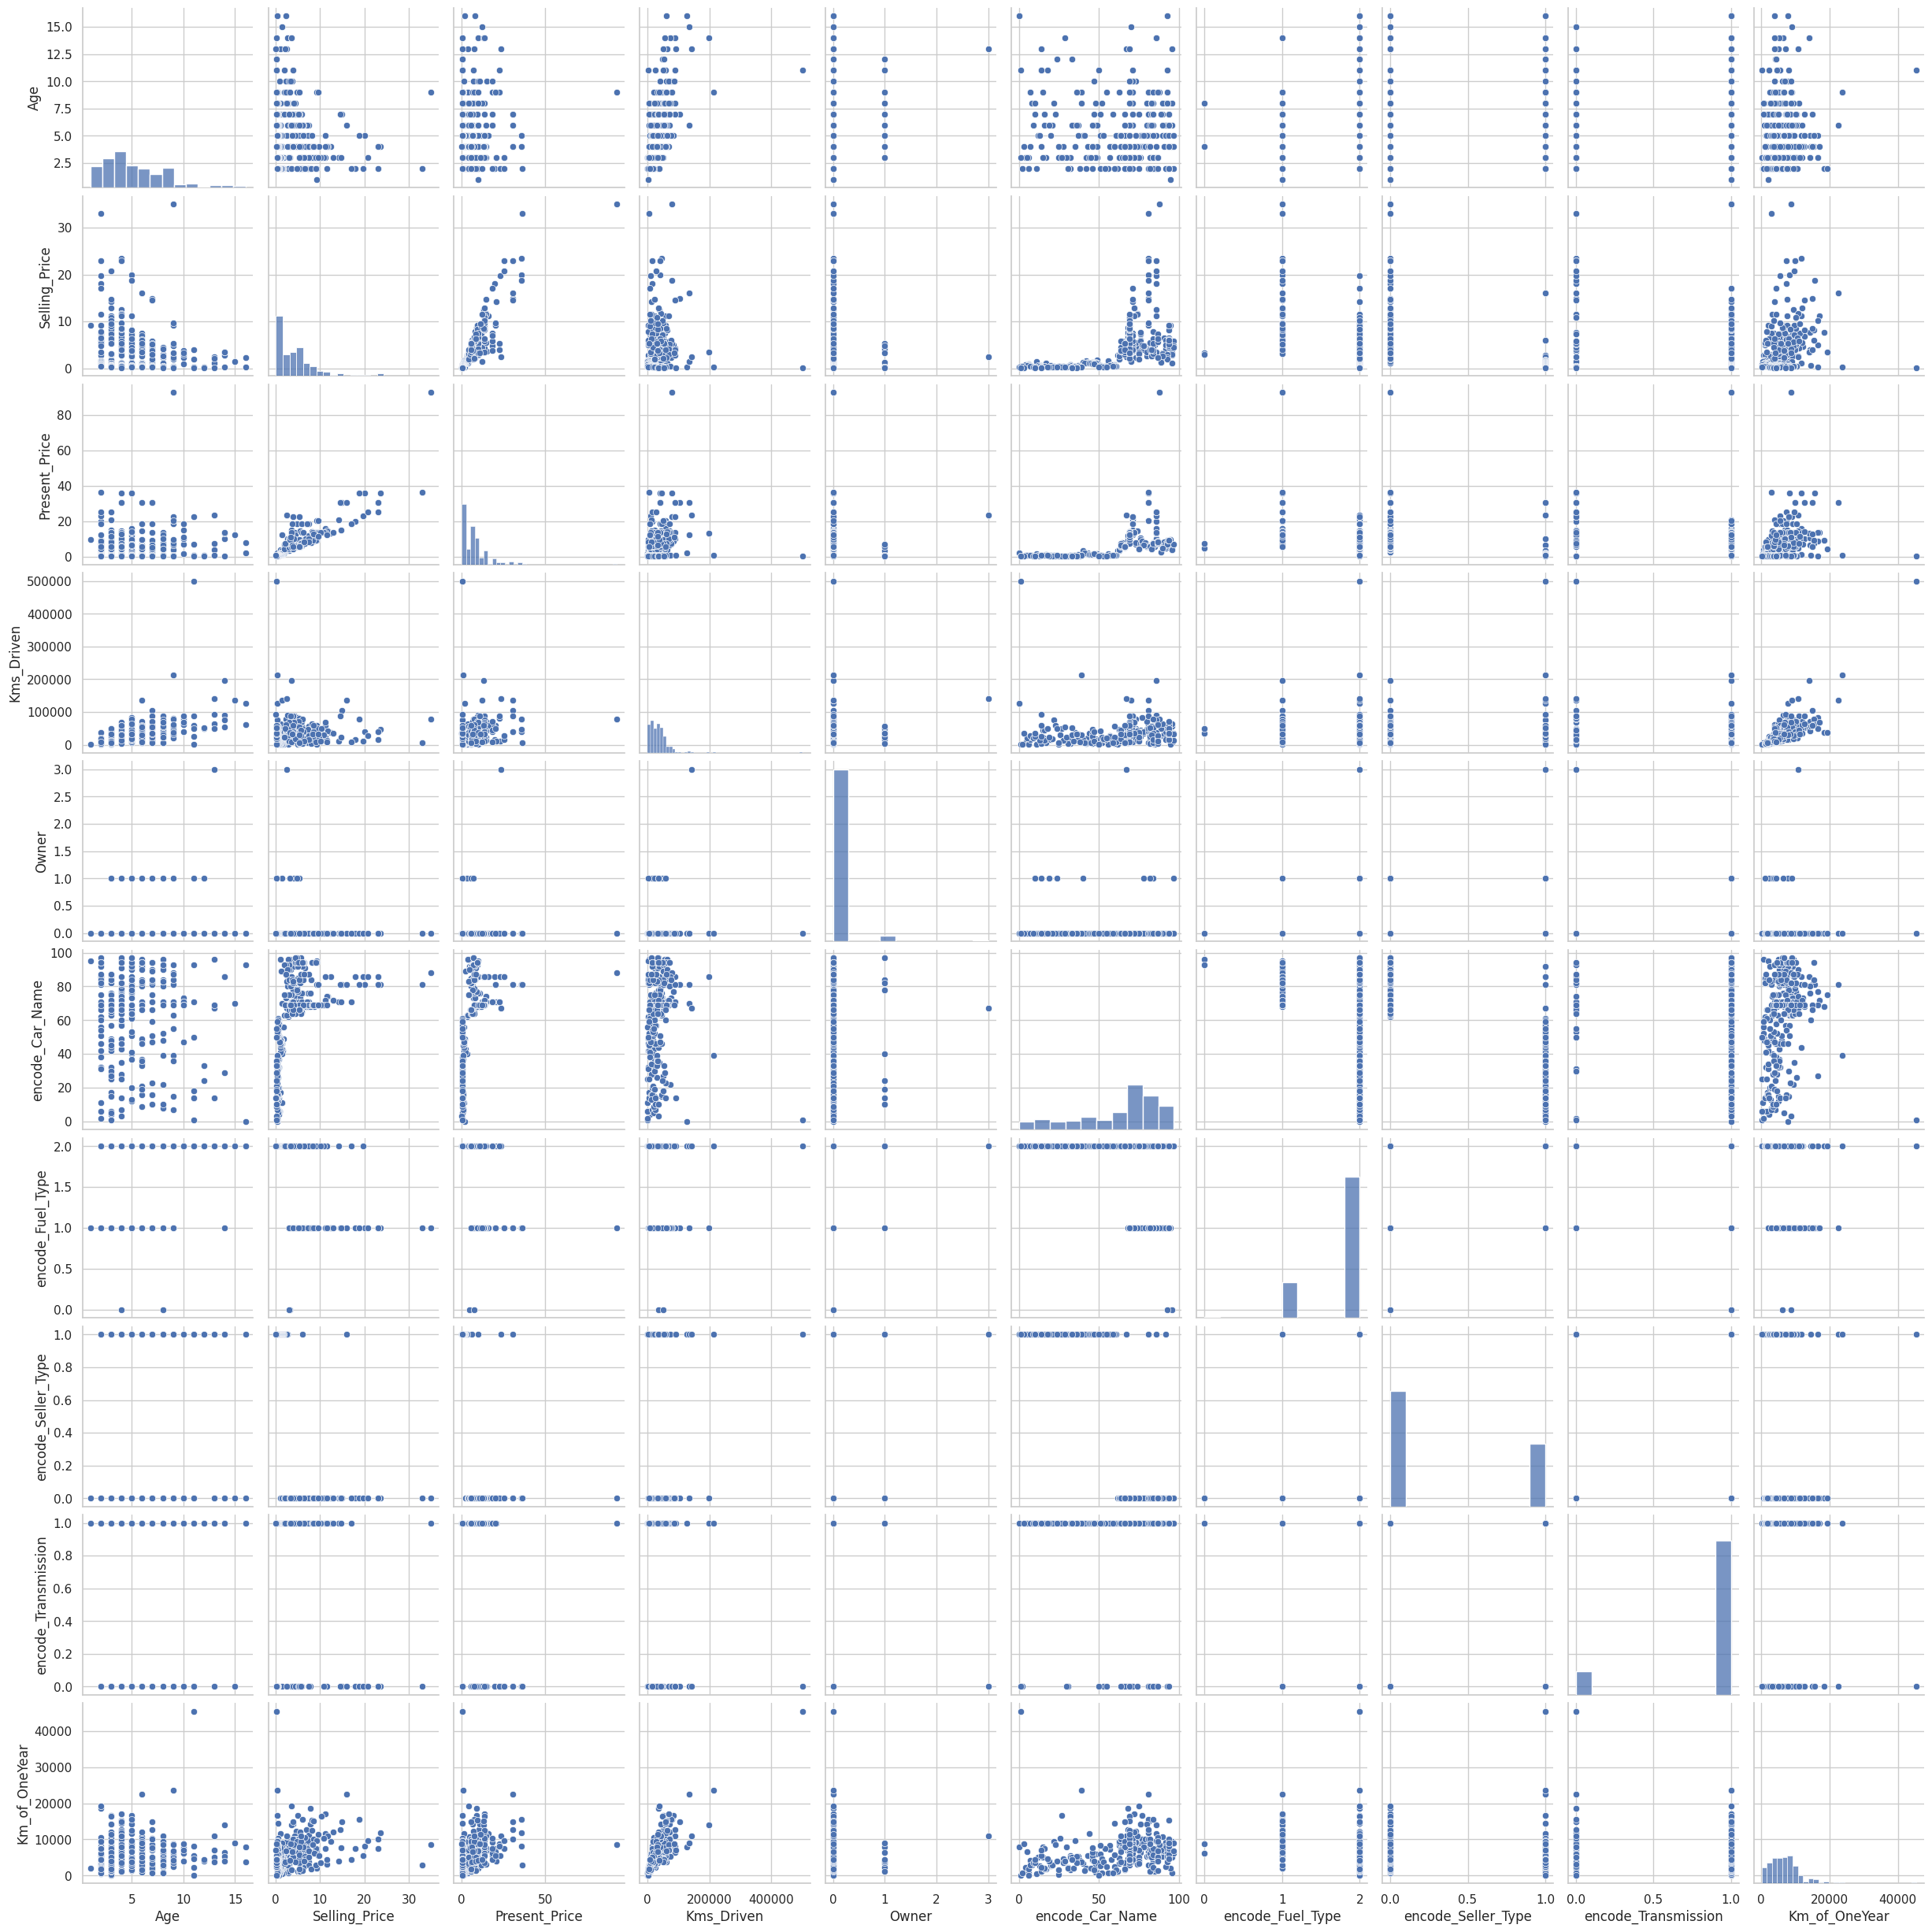

In [ ]:
sns.pairplot(Data)

In [ ]:
Data_columns= ['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'encode_Car_Name', 'encode_Fuel_Type', 'encode_Seller_Type',
       'encode_Transmission','Km_of_OneYear']

In [ ]:
scaler = MinMaxScaler()
Data_standatd = Data.copy()
Data_standatd[Data_columns] = scaler.fit_transform(Data[Data_columns])

In [ ]:
Data_standatd

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,encode_Car_Name,encode_Fuel_Type,encode_Seller_Type,encode_Transmission,Km_of_OneYear
0,0.266667,0.093123,0.057109,0.053053,0.0,0.927835,1.0,0.0,1.0,0.115557
1,0.333333,0.133238,0.099913,0.085085,0.0,0.958763,0.5,0.0,1.0,0.154567
2,0.066667,0.204871,0.103273,0.012813,0.0,0.701031,1.0,0.0,1.0,0.072499
3,0.466667,0.078797,0.041504,0.009409,0.0,0.989691,1.0,0.0,1.0,0.010672
4,0.266667,0.128940,0.070980,0.083984,0.0,0.948454,0.5,0.0,1.0,0.183787
...,...,...,...,...,...,...,...,...,...,...
296,0.133333,0.269341,0.122237,0.067043,0.0,0.711340,0.5,0.0,1.0,0.246482
297,0.200000,0.111748,0.060468,0.119119,0.0,0.680412,1.0,0.0,1.0,0.327534
298,0.600000,0.093123,0.115735,0.175043,0.0,0.711340,1.0,0.0,1.0,0.190487
299,0.066667,0.326648,0.131990,0.017017,0.0,0.711340,0.5,0.0,1.0,0.095684


In [ ]:
X = Data_standatd.drop(['Selling_Price' ] , axis = 1)
Y = Data_standatd['Selling_Price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=13)

In [ ]:
linearRegression = LinearRegression()
linearRegression.fit(X_train ,Y_train )
Y_prd_smpl_reg_Test = linearRegression.predict(X_test)
print ("------TEST------")
print ("MAE in test is :" , mean_absolute_error(Y_test, Y_prd_smpl_reg_Test))
print ("MSE in test is :" , mean_squared_error(Y_test, Y_prd_smpl_reg_Test))
print ("R2 Score test is : " , r2_score(Y_test , Y_prd_smpl_reg_Test))
print ("------TRAIN------")
Y_prd_smpl_reg_Train = linearRegression.predict(X_train)
print ("MAE in train is :" , mean_absolute_error(Y_train, Y_prd_smpl_reg_Train))
print ("MSE in train is :" , mean_squared_error(Y_train, Y_prd_smpl_reg_Train))
print ("R2 Score train is : " , r2_score(Y_train, Y_prd_smpl_reg_Train))

------TEST------
MAE in test is : 0.0403554969287201
MSE in test is : 0.004331302223644243
R2 Score test is :  0.8569609493539163
------TRAIN------
MAE in train is : 0.03269113023817648
MSE in train is : 0.002378725622851586
R2 Score train is :  0.8799606373125594


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(len(Y_test))),
    y=Y_test,
    mode='markers',
    name='Y Test',
    marker=dict(
        size=8,
        color='blue',
        opacity=0.7,
    )
))

# Add a scatter plot for Y_pred
fig.add_trace(go.Scatter(
    x=list(range(len(Y_prd_smpl_reg_Test))),
    y=Y_prd_smpl_reg_Test,
    mode='lines+markers',
    name='Y Prediction',
    line=dict(
        color='red',
        width=2,
    )
))

fig.update_layout(
    title='Y Test vs Y Prediction',
    xaxis_title='Data Points',
    yaxis_title='Values',
    paper_bgcolor='black',
    font=dict(
        family='Arial',
        color='white'
    )
)

fig.show()

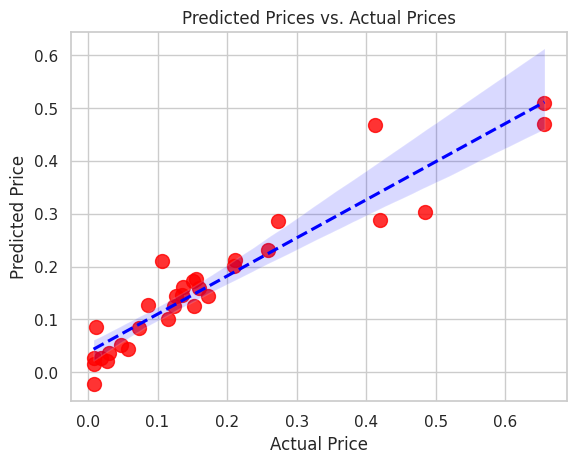

In [ ]:


plt.ticklabel_format(style='plain')

ax = sns.regplot(x=Y_test, y=Y_prd_smpl_reg_Test, line_kws={"color": "blue", "linestyle": "--"}, scatter_kws={'s': 100, 'color': 'red', 'marker': 'o'})

ax.set(xlabel="Actual Price", ylabel="Predicted Price", title="Predicted Prices vs. Actual Prices")

plt.grid(True)

plt.show()



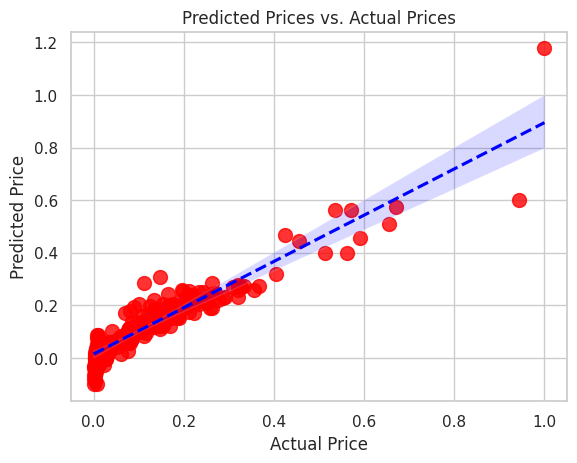

In [ ]:


plt.ticklabel_format(style='plain')

ax = sns.regplot(x=Y_train, y=Y_prd_smpl_reg_Train, line_kws={"color": "blue", "linestyle": "--"}, scatter_kws={'s': 100, 'color': 'red', 'marker': 'o'})

ax.set(xlabel="Actual Price", ylabel="Predicted Price", title="Predicted Prices vs. Actual Prices")

plt.grid(True)

plt.show()

